Model haqida: bu yerda `resned34` deb nomlanuvchi qriyb `1.3mln` ta rasm yordamida oqitilgan modeldan foydalanamiz
Dataset: Oxford-IIIT Pet dataset (7349 ta cat(mushuk) va dog(it)larning rasmlaridan tashkil topgan dataset)

In [4]:
from fastai.vision.all import *
from ipywidgets import widgets

path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

#training
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 66.4MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.160796,0.022198,0.991881,00:50


epoch,train_loss,valid_loss,accuracy,time
0,0.061677,0.020450,0.993234,00:52
1,0.031363,0.011441,0.997294,01:00


Modelni ishlashini tekshirib koramiz

In [9]:
upload= widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi?: False
Aniqlilik ehtimolligi: 0.000


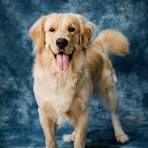

In [12]:
img = PILImage.create(upload.data[-1])
is_cat,_,probs = learn.predict(img)
print(f"Mushukmi?: {is_cat}")
print(f"Aniqlilik ehtimolligi: {probs[1].item():.3f}")
img